In [1]:
%matplotlib inline
import pandas as pd
import emsalib as emsa
import matplotlib.pyplot as plt

In [2]:
dataset_path = 'data/Alice.csv'
header = pd.read_csv(dataset_path, nrows=1, header=None)
header = header.values[0]
alice = pd.read_csv(dataset_path)

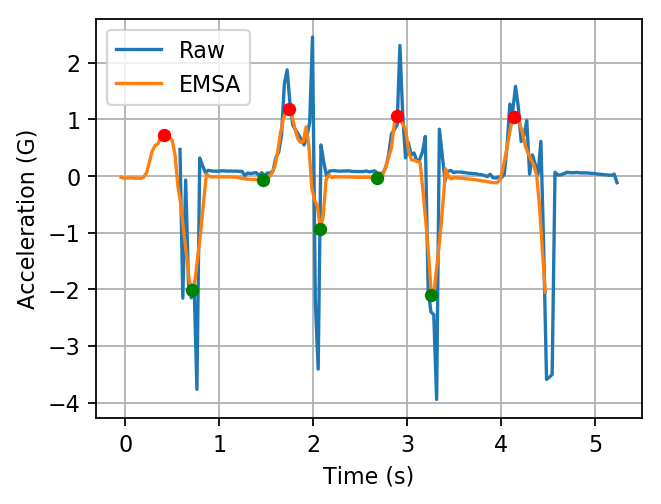

In [3]:
ts = alice['Timestamp'].values
ts_orig = ts - min(ts)
axis = [alice['Axis' + str(i+1)].values for i in range(3)]

axis = emsa.TimeSeries(ts=ts, ys=axis[0])


emsa0 = emsa.EMSA(flt_type='ma', filterLen = 5, searchOrd= 15)

plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
axis.plot(200,350, -1.445474439e9) 
motifs = emsa0.process(axis)
axis.plot(200,350,-1.445474439e9) 
plt.grid()
plt.legend(['Raw', 'EMSA'])
plt.show()

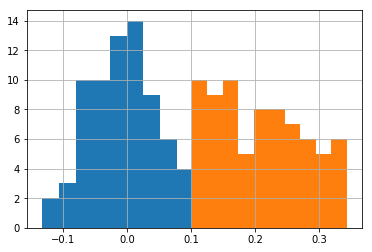

In [4]:
meanMotif = [m.getMean() for m in motifs]
plt.figure()
plt.hist(meanMotif)
varMotif = [m.getVar() for m in motifs]
plt.hist(varMotif)
plt.grid()

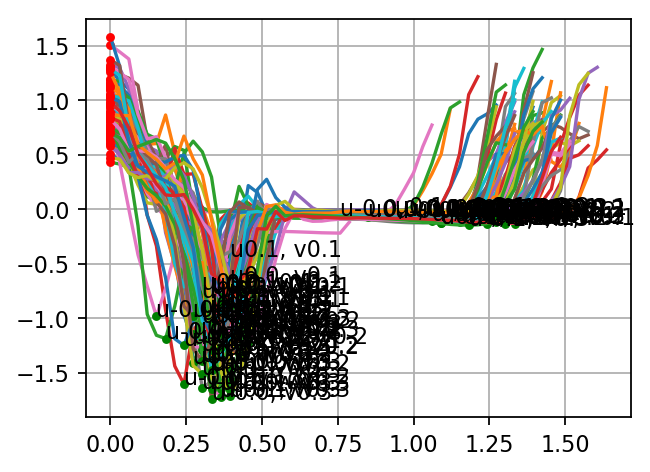

In [5]:
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
       
for m in motifs:
    m.plot()    
plt.grid()